In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [5]:
from src.data.download_GBD import load_covariates, YEARS

In [47]:
df = load_covariates()

c:\users\zrankin\appdata\local\continuum\miniconda3\envs\health_indicators\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
c:\users\zrankin\documents\github\health_indicators\src\data\download_GBD.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  output = pd.concat([output, data])


In [39]:
df.head()

,location_id,year_id,indicator,val
8900,6,1990,Antenatal Care (4+ visits),70.816527
8901,7,1990,Antenatal Care (4+ visits),77.636575
8902,8,1990,Antenatal Care (4+ visits),91.915715
8903,10,1990,Antenatal Care (4+ visits),44.607541
8904,11,1990,Antenatal Care (4+ visits),80.202972


AttributeError: 'AxesSubplot' object has no attribute 'show'

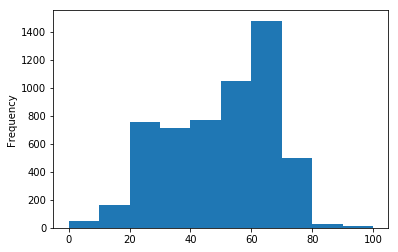

In [49]:
g = df.query('indicator == "log_LDI"').val.plot.hist()
g.show()

In [25]:
df.year_id.unique()

array([1990, 1995, 2000, 2005, 2010, 2016], dtype=int64)

In [26]:
from src.data.download_GBD import download_GBD_data

In [50]:
%%time
df = download_GBD_data()

Wall time: 41.5 s


In [51]:
df.shape

(36271, 6)

## Random - how to get rank order by group 
Eventually, for ordering the clusters by U5MR

In [53]:
df.location_id.value_counts().head()

155    187
351    186
139    186
204    186
172    186
Name: location_id, dtype: int64

In [62]:
df.columns

Index(['location_id', 'ihme_loc_id', 'location_name', 'year_id', 'indicator',
       'val'],
      dtype='object')

In [67]:
val_by_cluster = df.groupby('year_id')['val'].mean().reset_index()
val_by_cluster['U5MR_rank'] = val_by_cluster.val.rank().astype('int')
val_by_cluster

,year_id,val,U5MR_rank
0,1990,27.904786,6
1,1995,26.838402,5
2,2000,25.837506,4
3,2005,24.950200,3
4,2010,24.173713,2
5,2016,23.317228,1


In [68]:
cluster_map = val_by_cluster.set_index('year_id')['U5MR_rank'].to_dict()
cluster_map

{1990: 6, 1995: 5, 2000: 4, 2005: 3, 2010: 2, 2016: 1}

In [69]:
val_by_cluster['rank'] = val_by_cluster.year_id.map(cluster_map)
val_by_cluster

,year_id,val,U5MR_rank,rank
0,1990,27.904786,6,6
1,1995,26.838402,5,5
2,2000,25.837506,4,4
3,2005,24.950200,3,3
4,2010,24.173713,2,2
5,2016,23.317228,1,1


In [71]:
pd.Series([1990, 1995]).map(cluster_map)

0    6
1    5
dtype: int64

In [72]:
cluster_map.to_json()

AttributeError: 'dict' object has no attribute 'to_json'

In [58]:
ranks = locs.rank()

In [61]:
ranks

,0
0,24.0
1,25.0
2,26.0
3,27.0
4,28.0
5,29.0
6,30.0
7,31.0
8,32.0
9,33.0


In [73]:
df.head()

,location_id,ihme_loc_id,location_name,year_id,indicator,val
522,33,ARM,Armenia,1990,Ambient particulate matter pollution,23.377605
523,33,ARM,Armenia,1990,Antenatal Care (4+ visits),93.002736
524,33,ARM,Armenia,1990,Child stunting,21.386849
525,33,ARM,Armenia,1990,Child underweight,4.700177
526,33,ARM,Armenia,1990,Child wasting,4.305288


In [74]:
data = df.set_index('location_name')
data.head()

,location_id,ihme_loc_id,year_id,indicator,val
location_name,,,,,
Armenia,33,ARM,1990,Ambient particulate matter pollution,23.377605
Armenia,33,ARM,1990,Antenatal Care (4+ visits),93.002736
Armenia,33,ARM,1990,Child stunting,21.386849
Armenia,33,ARM,1990,Child underweight,4.700177
Armenia,33,ARM,1990,Child wasting,4.305288


In [80]:
data.index.tolist()

['Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Armenia',
 'Ar

In [78]:
data.loc[['Ethiopia'] + ['Argentina']]

,location_id,ihme_loc_id,year_id,indicator,val
location_name,,,,,
Ethiopia,179,ETH,1990,Ambient particulate matter pollution,38.472163
Ethiopia,179,ETH,1990,Antenatal Care (4+ visits),18.052347
Ethiopia,179,ETH,1990,Child stunting,82.403585
Ethiopia,179,ETH,1990,Child underweight,56.020049
Ethiopia,179,ETH,1990,Child wasting,23.909792
Ethiopia,179,ETH,1990,Congenital birth defects,11.368370
Ethiopia,179,ETH,1990,DTP3 coverage,20.011663
Ethiopia,179,ETH,1990,Diarrheal diseases,23.767898
Ethiopia,179,ETH,1990,Diphtheria,27.639402
